/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/home/lexakhar/snap/jupyter/common/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                    

predicted=160567.586145, expected=168770.000000
predicted=168663.164183, expected=179980.000000
predicted=180779.637870, expected=171030.000000
predicted=172997.622887, expected=174360.000000
predicted=175767.038255, expected=182800.000000
predicted=184269.531453, expected=179450.000000
predicted=182237.721304, expected=181200.000000
predicted=183583.138051, expected=171990.000000
predicted=171773.345394, expected=178500.000000
predicted=178610.441364, expected=178050.000000
predicted=178104.698847, expected=183800.000000
predicted=186291.215138, expected=187030.000000
predicted=186900.023038, expected=192250.000000
predicted=194879.271698, expected=192720.000000
predicted=194136.117869, expected=189750.000000
predicted=192552.781670, expected=195690.000000
predicted=197593.145974, expected=191860.000000
predicted=193961.124292, expected=192250.000000
predicted=193792.010411, expected=189570.000000
predicted=189301.232975, expected=189160.000000
predicted=189173.047475, expected=185150

predicted=185434.946241, expected=183640.000000
predicted=185586.031861, expected=185030.000000
predicted=186378.930084, expected=187010.000000
predicted=188050.297643, expected=188250.000000
predicted=188705.876095, expected=185130.000000
predicted=185699.199169, expected=185100.000000
predicted=185028.695033, expected=182600.000000
predicted=182182.334248, expected=185000.000000
predicted=185179.299390, expected=186980.000000
predicted=187085.303468, expected=186200.000000
predicted=186485.487805, expected=188220.000000
predicted=188125.948600, expected=190340.000000
predicted=191118.588841, expected=190300.000000
predicted=191174.779923, expected=189550.000000
predicted=190502.967348, expected=193050.000000
predicted=194115.570186, expected=203500.000000
predicted=205753.972516, expected=199010.000000
predicted=201288.064531, expected=201010.000000
Test MSE: 14000186.809


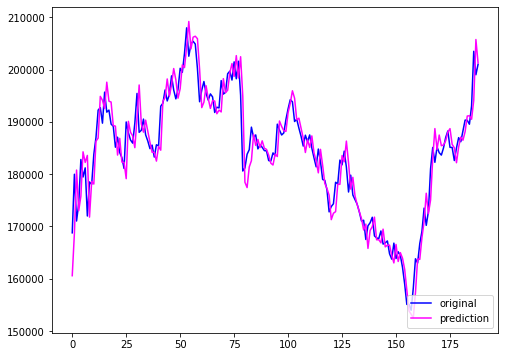

In [52]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('gazprom2.csv', header=0, parse_dates=[0], index_col=0, squeeze=True) #, date_parser=parser)
X = series.values
X = [e[-1]*1000 for e in X]
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(6,2,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test, color='blue', label='original')
pyplot.plot(predictions, color='magenta', label='prediction')
pyplot.legend(loc="lower right")
pyplot.show()

In [53]:
diff = np.array(test) - np.array(predictions)
diff = np.array([abs(i) for i in diff])
print('Среднее значение модуля отклонения: {}'.format(diff.mean()))

Среднее значение модуля отклонения: 12766.244183898676


/home/lexakhar/snap/jupyter/common/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=176113.100320, expected=178500.000000
predicted=175497.296313, expected=198620.000000
predicted=199902.090513, expected=188000.000000
predicted=187800.345417, expected=193300.000000
predicted=195097.919201, expected=196370.000000
predicted=195719.588938, expected=187690.000000
predicted=189412.507382, expected=188050.000000
predicted=192046.020485, expected=177030.000000
predicted=173357.698350, expected=186000.000000
predicted=186091.463871, expected=183200.000000
predicted=179846.100686, expected=188340.000000
predicted=186653.406776, expected=186600.000000
predicted=186072.245793, expected=187520.000000
predicted=187662.910401, expected=193100.000000
predicted=195605.260704, expected=196200.000000
predicted=197239.616041, expected=202400.000000
predicted=205341.431641, expected=201850.000000
predicted=204049.030374, expected=201990.000000
predicted=205346.908263, expected=199990.000000
predicted=202695.307652, expected=196000.000000
predicted=197143.925460, expected=187220

predicted=239518.442687, expected=240460.000000
predicted=240089.401416, expected=241510.000000
predicted=240651.920779, expected=247950.000000
predicted=247381.037915, expected=252200.000000
predicted=252794.740689, expected=250310.000000
predicted=251796.696986, expected=249720.000000
predicted=252186.540079, expected=250710.000000
predicted=252620.991052, expected=260050.000000
predicted=262556.687336, expected=264490.000000
predicted=266372.673376, expected=264650.000000
predicted=266905.256099, expected=269200.000000
predicted=272918.481563, expected=274440.000000
predicted=278338.041249, expected=276190.000000
predicted=280316.101609, expected=276700.000000
predicted=279907.514787, expected=282500.000000
predicted=285641.355983, expected=285020.000000
predicted=288064.645564, expected=278530.000000
predicted=280598.157460, expected=278000.000000
Test MSE: 23648939.295


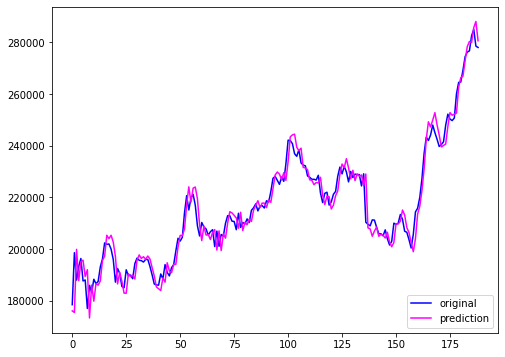

In [49]:
series = read_csv('sber.csv', header=0, parse_dates=[0], index_col=0, squeeze=True) #, date_parser=parser)
X = series.values
X = [e[-1]*1000 for e in X]
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,2,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test, color='blue', label='original')
pyplot.plot(predictions, color='magenta', label='prediction')
pyplot.legend(loc="lower right")
pyplot.show()

In [50]:
import numpy as np
diff = np.array(test) - np.array(predictions)

In [51]:
diff = np.array([abs(i) for i in diff])
diff.mean()

24843.61649049524

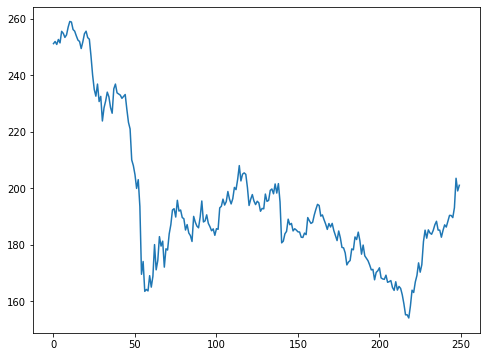

In [30]:
import csv
with open('gazprom.csv') as File:  
    reader = csv.reader(File)
    y = []
    for row in reader:
        y.append(float(row[3]))

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8,6] 
plt.plot(y)

In [45]:
diff = np.array([abs(i) for i in diff])
diff.mean()

24843.61649049524

In [31]:
len(y)

250